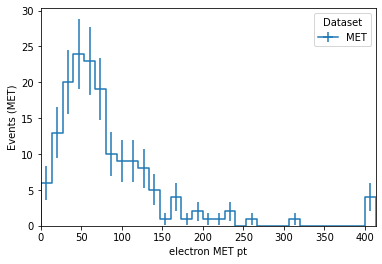

In [10]:
import uproot 
import numpy as np
import coffea
from coffea.nanoaod import NanoEvents
from coffea import hist

fname = "/uscms/home/dlehner/nobackup/analysis/data/nanoAOD.root"
events = NanoEvents.from_file(fname)

mask_length2=events.Electron.counts==2
mask_pt30 = (events.Electron.pt>3).all()
mask = np.logical_and(mask_pt30, mask_length2)

histo1 = hist.Hist(
            "Events (MET)",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_pt", "electron MET pt", 30, 0, 400),
        )
histo1.fill(dataset="MET",ele_pt=events.MET.pt[mask].flatten())

%matplotlib inline
hist.plot1d(histo1, overflow="over")

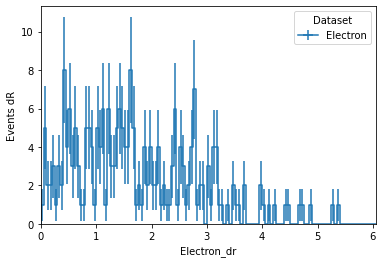

In [2]:
ele_pairs_dR = events.Electron.choose(2).i0.delta_r(events.Electron.choose(2).i1)

histo2 = hist.Hist(
            "Events dR",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_dr", "Electron_dr", 120, 0, 6),
        )
histo2.fill(dataset="Electron",ele_dr=ele_pairs_dR.flatten())

%matplotlib inline
hist.plot1d(histo2, overflow="over")

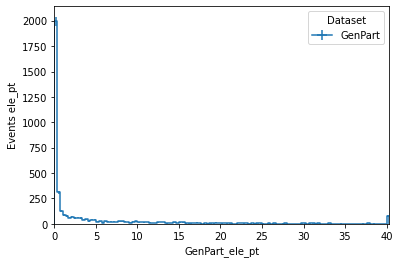

In [3]:
mask_ele = abs(events.GenPart.pdgId)==11
gen_ele_pt = events.GenPart.pt[mask_ele]

histo3 = hist.Hist(
            "Events ele_pt",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("genpart_ele_pt", "GenPart_ele_pt", 120, 0, 40),
        )
histo3.fill(dataset="GenPart",genpart_ele_pt=gen_ele_pt.flatten())

%matplotlib inline
hist.plot1d(histo3, overflow="over")

(0.5, 500)

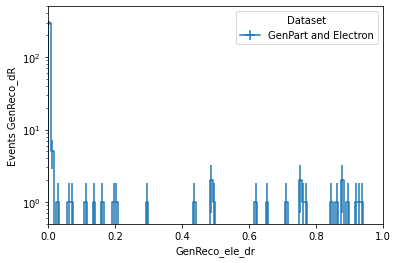

In [16]:
gen_reco_pairs = events.Electron.cross(events.GenPart[mask_ele])
gen_reco_deltar = gen_reco_pairs.i0.delta_r(gen_reco_pairs.i1).min()
histo4 = hist.Hist(
            "Events GenReco_dR",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("gen_reco", "GenReco_ele_dr", 120, 0, 1),
        )
histo4.fill(dataset = "GenPart and Electron", gen_reco = gen_reco_pairs.i0.delta_r(gen_reco_pairs.i1).min()
.flatten())

%matplotlib inline
ax4 = hist.plot1d(histo4)
ax4.set_yscale("log")
ax4.set_ylim(0.5, 500)